# <center> <u><font size = 24, color="#7B241C"> Logistic Regression 02 </u> 

In [1]:
##=================================================================
##              Importing Necessary Modules
##=================================================================

import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
from statsmodels.formula.api import glm

%matplotlib inline

In [2]:
##=================================================================
##             Reading the data
##=================================================================

churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [3]:
##=================================================================
##      Building length of relationship logistic model
##=================================================================

len_relationship_mdl = glm("has_churned ~ time_since_first_purchase", data = churn,
                       family = sm.families.Binomial()).fit()
print("="*80)
print("The Length Relationship Logistic Model Results".center(80))
print("="*80, end="\n\n")
print(len_relationship_mdl.summary())
print(end="\n\n\n")
##=================================================================
##      Building length of recency logistic model
##=================================================================
recency_model = glm("has_churned ~ time_since_last_purchase", 
                   data = churn,
                   family = sm.families.Binomial()).fit()

print("="*80)
print("The Recency Relationship Logistic Model Results".center(80))
print("="*80, end="\n\n")
print(recency_model.summary())

                 The Length Relationship Logistic Model Results                 

                 Generalized Linear Model Regression Results                  
Dep. Variable:            has_churned   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.87
Date:                Sat, 01 Jan 2022   Deviance:                       543.73
Time:                        00:54:57   Pearson chi2:                     400.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02661
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

# Prediction with Logistic Regression

  - Making prediction with a logistic model is the same as  prediction for linear models. We follow the next steps:
  - Create a DataFrame of new explanatory variable values. 
  - Calculat the response values using the `predict()` method.
  - Use `assign()` method to combine new explanatory variable data with the predicted values
  
**Here is the syntax**:

```python
## Create the new data
new_exp_data = pd.DataFrame({"explanatory-var-name": [array of values]})

## Create the predicted data
pred_data = new_exp_data.assign(
    response_var = fitted_model.predict(new_exp_data))
```




In [4]:
##=================================================================
##            Create Predicted data
##=================================================================

new_explanatory_data = pd.DataFrame(
    {"time_since_last_purchase": np.arange(-1, 6.50, 0.25)})

# Create predicted data
predicted_data = new_explanatory_data.assign(
    has_churned = recency_model.predict(new_explanatory_data))

## Print the head of data
predicted_data.head()

,time_since_last_purchase,has_churned
0,-1.00,0.424523
1,-0.75,0.441043
2,-0.50,0.457695
3,-0.25,0.474441
4,0.00,0.491246


## Visualizing Predicted Data

- we can add prediction data points on top of the plot of the original data to get a clear view of our predictions.  

- In order to achieve this, we use:
    - `sns.regplot()` with logistic set to True
    - `sns.scatterplot()` to plot the predicted data points

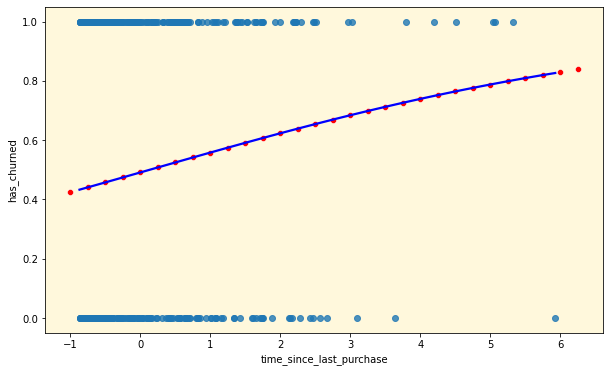

In [5]:
##=================================================================
##            Visualize the Predicted data
##=================================================================
plt.rcParams['axes.facecolor']= "#FFF8DC"
plt.rcParams['figure.figsize'] = (10, 6)


sns.regplot(x = "time_since_last_purchase",
            y = "has_churned",
            data = churn, 
            logistic = True,
            ci = None,
            line_kws={"color": "blue"})

sns.scatterplot(x="time_since_last_purchase",
            y="has_churned",
            data = predicted_data, 
            ci = None,
            color = "red")


plt.show()

## Classifying the Outcome Based on a Cutoff

- The main reason of logistic regression to classify cases. The simplest method we can do is:
    - Set a **cutoff**, a **50%** for example (because our model generates probabilities)
    - Round the probabilities using `np.round()` function.
    - If the probability is greater than the **cutoff** we predict **1**
    - If the probability is less than the **cutoff** we predict **0**

- In our example: 
  - If the probability of churning is less than 0.5, we predict no-churn.
  - If probability is greater then 0.5, we predict churn.

## Visualizing Data Based on Cutoff

  - Plotting your results gives a clear picture to you. 

In [6]:
## Calculate the most like outcome
## -------------------------------

predicted_data["most_likely_outcome"] = np.round(predicted_data['has_churned'])

# Print the head of predicted_data
predicted_data.head(10)

,time_since_last_purchase,has_churned,most_likely_outcome
0,-1.00,0.424523,0.0
1,-0.75,0.441043,0.0
2,-0.50,0.457695,0.0
3,-0.25,0.474441,0.0
4,0.00,0.491246,0.0
5,0.25,0.508070,1.0
6,0.50,0.524876,1.0
7,0.75,0.541626,1.0
8,1.00,0.558283,1.0
9,1.25,0.574809,1.0


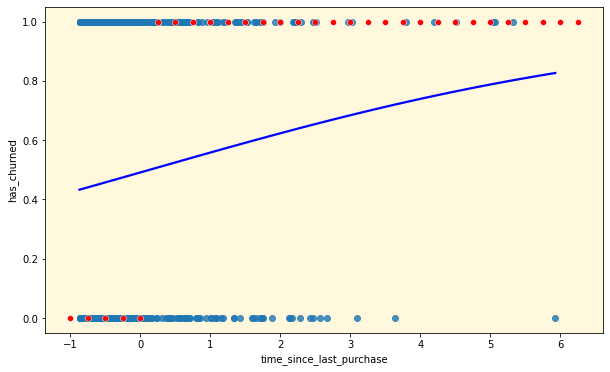

In [7]:
## Visualize the classified Outcome
## ---------------------------------

plt.rcParams['axes.facecolor']= "#FFF8DC"
plt.rcParams['figure.figsize'] = (10, 6)
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data= churn, 
            logistic=True,
            ci = None,
            line_kws={"color": "blue"})
 
sns.scatterplot(x="time_since_last_purchase",
            y="most_likely_outcome",
            data= predicted_data, 
            color = "red")
#plt.axvline(x = 0.1, linestyle = 'dashed', color = "green")

plt.show()

## Odds Ratio

### Calculating odds ratio

- Recall that the odds ratio  is the probability that something happens, divided by the probability that it doesn't.

or 
$$odds\_ratio = \frac{P(x)}{1- P(x)}$$

- Recall as well: 
  - The baseline of odds_ratio is 1.
  - If odds ratio is less than 1, then the event won't happen
  - If odds ratio is greater than 1, the event does happen.
  
### Visualizing The Odds Ratio

- Plotting the odds ratio against the explanatory variable and check against the baseline of 1 to see when the event happens and when it doesn't, in our example:
    - In the bottom-left, the predictions are below one, so the **chance of churning is less than the chance of not churning**.
    -  In the top-right, the **chance of churning is greater than the chance of not churning**.

- Plotting can done using `seaborn.lineplot()` function

- Adding a baseline is achieved using `plt.axhline()` function.

In [8]:
## Calculate the odds ratio
## --------------------------
predicted_data['odds_ratio'] = (predicted_data['has_churned'] / 
                              (1 - predicted_data["has_churned"]))
## Note that I am using parentheses () so I can break the code into lines

# print the head of data
predicted_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.00,0.424523,0.0,0.737688
1,-0.75,0.441043,0.0,0.789046
2,-0.50,0.457695,0.0,0.843980
3,-0.25,0.474441,0.0,0.902738
4,0.00,0.491246,0.0,0.965587


## Visualizing Odds Ratio

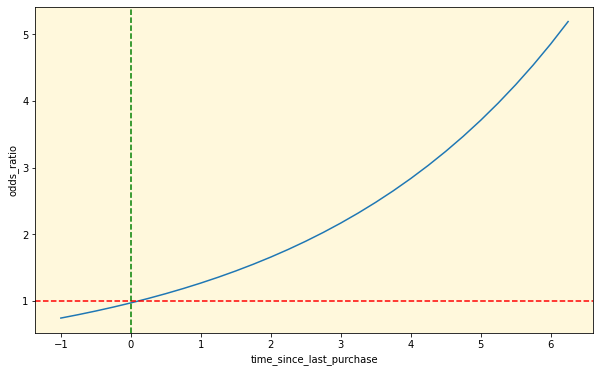

In [9]:
sns.lineplot(x = "time_since_last_purchase",
             y = 'odds_ratio',
             data = predicted_data)

plt.axhline(y = 1, linestyle = 'dashed', color = "red")
plt.axvline(x = 0, linestyle = 'dashed', color = "green")
plt.show()

## Visualizing Log Odds (Logit)

- Recall from the theory lecture, the log odds is called **logit**. Also, recall that log odds transforms the relationship into linear. 

- In this section we calculate the log-odds-ratio by using `np.log()` function

- We also visualize the log-odds against the explanatory variable.

### Note:
- We can use `plt.yscale()` and pass the log as an option to plot the log odds

In [10]:
## Calculate the log odds ratio
## --------------------------
predicted_data['log_odds_ratio'] = np.log(predicted_data['odds_ratio'])

# Print the head of the data
predicted_data.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.00,0.424523,0.0,0.737688,-0.304234
1,-0.75,0.441043,0.0,0.789046,-0.236931
2,-0.50,0.457695,0.0,0.843980,-0.169627
3,-0.25,0.474441,0.0,0.902738,-0.102323
4,0.00,0.491246,0.0,0.965587,-0.035019


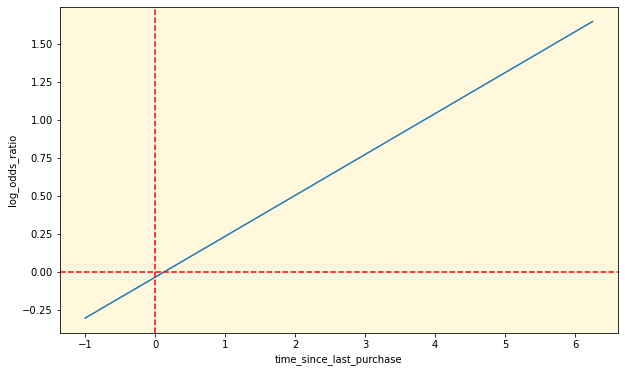

In [11]:
## Visualize the log odds ratio
## -----------------------------

sns.lineplot(x = "time_since_last_purchase",
            y = 'log_odds_ratio',
            data = predicted_data)
plt.axhline(y = 0, linestyle = 'dashed', color = "red")
plt.axvline(x = 0, linestyle = 'dashed', color = "red")
plt.show()

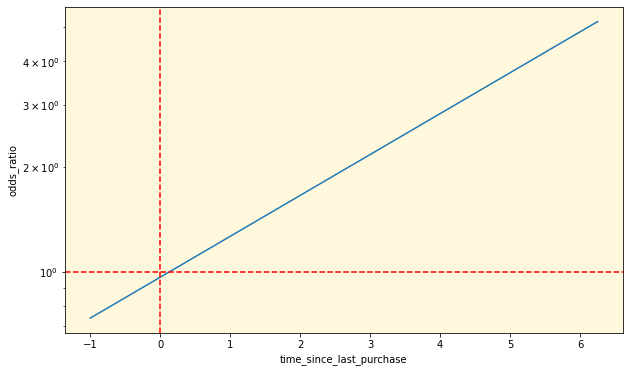

In [12]:
## Use yscale('log') to plot the log odds ratio
## ---------------------------------------------

sns.lineplot(x = "time_since_last_purchase",
            y = 'odds_ratio',
            data = predicted_data)
plt.axhline(y = 1, linestyle = 'dashed', color = "red")
plt.axvline(x = 0, linestyle = 'dashed', color = "red")
plt.yscale('log')
plt.show()

## Final Results:

- At this stage, we print the first and last 5 observations of the predicted data to see the difference between all values, probabilities, odds ratio, log odds ratio, and the classified outcome.

In [13]:
print("="*80)
print("The first five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(predicted_data.head())
print(end="\n\n\n")

print("="*80)
print("The last five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(predicted_data.tail())
print(end="\n\n\n")

               The first five observation of the predicted Data                 

   time_since_last_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                     -1.00     0.424523                  0.0    0.737688   
1                     -0.75     0.441043                  0.0    0.789046   
2                     -0.50     0.457695                  0.0    0.843980   
3                     -0.25     0.474441                  0.0    0.902738   
4                      0.00     0.491246                  0.0    0.965587   

   log_odds_ratio  
0       -0.304234  
1       -0.236931  
2       -0.169627  
3       -0.102323  
4       -0.035019  



                The last five observation of the predicted Data                 

    time_since_last_purchase  has_churned  most_likely_outcome  odds_ratio  \
25                      5.25     0.798727                  1.0    3.968384   
26                      5.50     0.809330                  1.0    4.244665   
27              

---
## Practice with Length of Relationship Logistic Model

In [14]:
## Setting Plots confifuration
plt.rcParams['axes.facecolor']= "#F5F5DC"
plt.figure(figsize = (8, 6))

## New Explanatory Variable Data 
new_exp_data = pd.DataFrame({
    'time_since_first_purchase': np.arange(-1.50, 4, .25)})

## Create pred_data using assign()

pred_data = new_exp_data.assign(
    has_churned = len_relationship_mdl.predict(new_exp_data)
)

# Print the head
pred_data.head()

,time_since_first_purchase,has_churned
0,-1.50,0.626448
1,-1.25,0.605470
2,-1.00,0.584096
3,-0.75,0.562401
4,-0.50,0.540465


<Figure size 576x432 with 0 Axes>

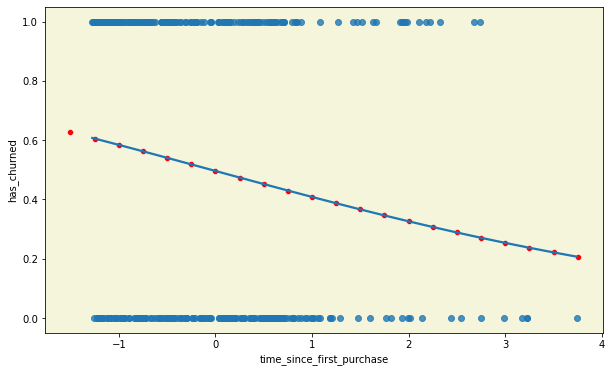

In [15]:
# Create a scatter plot with logistic trend line
sns.regplot(
    x = "time_since_first_purchase",
    y= "has_churned",
    data = churn,
    ci = None,
    logistic = True
)

# Overlay with pred_data, colored red

sns.scatterplot(x = "time_since_first_purchase",
            y= "has_churned",
            data= pred_data,
            color = "red")
plt.show()

In [16]:
# Add most_likely_outcome to pred_data
pred_data["most_likely_outcome"] = np.round(pred_data["has_churned"])

# Print the head
pred_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome
0,-1.50,0.626448,1.0
1,-1.25,0.605470,1.0
2,-1.00,0.584096,1.0
3,-0.75,0.562401,1.0
4,-0.50,0.540465,1.0


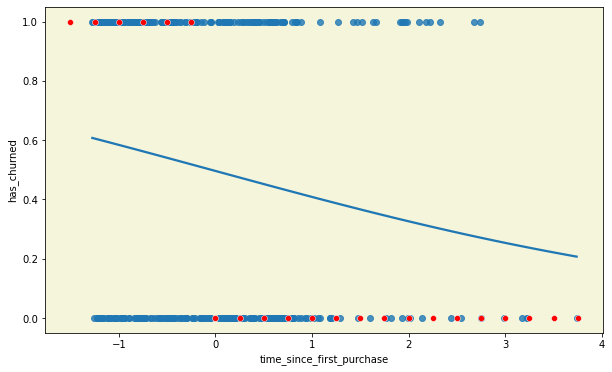

In [17]:
# Create a scatter plot with logistic trend line
sns.regplot(
    x = "time_since_first_purchase",
    y= "has_churned",
    data = churn,
    ci = None,
    logistic = True
)

# Overlay with pred_data, colored red

sns.scatterplot(x= "time_since_first_purchase",
            y= "most_likely_outcome",
            data= pred_data,
            color ="red")
plt.show()

In [18]:
# Update pred_data with odds_ratio
pred_data["odds_ratio"] = (pred_data['has_churned']/
                          (1 - pred_data['has_churned'])
                          )

# Print the head
pred_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.50,0.626448,1.0,1.677003
1,-1.25,0.605470,1.0,1.534661
2,-1.00,0.584096,1.0,1.404400
3,-0.75,0.562401,1.0,1.285197
4,-0.50,0.540465,1.0,1.176111


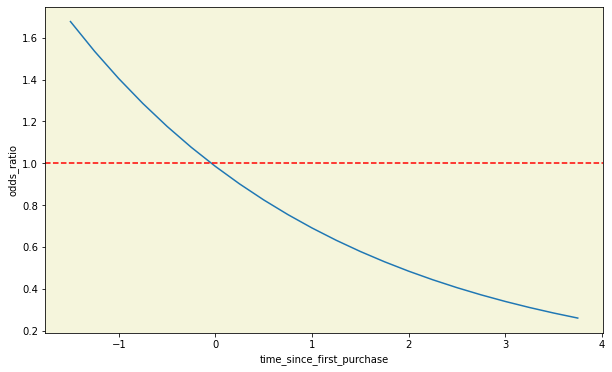

In [19]:
# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = "time_since_first_purchase",
            y = "odds_ratio",
            data = pred_data)

# Add a dashed horizontal line at odds_ratio = 1
plt.axhline(y = 1, linestyle = "dashed", color = "red")

plt.show()

In [20]:
# Update pred_data with log_odds_ratio
pred_data['log_odds_ratio'] = np.log(pred_data['odds_ratio'])

# Print the head
pred_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-1.50,0.626448,1.0,1.677003,0.517008
1,-1.25,0.605470,1.0,1.534661,0.428309
2,-1.00,0.584096,1.0,1.404400,0.339610
3,-0.75,0.562401,1.0,1.285197,0.250912
4,-0.50,0.540465,1.0,1.176111,0.162213


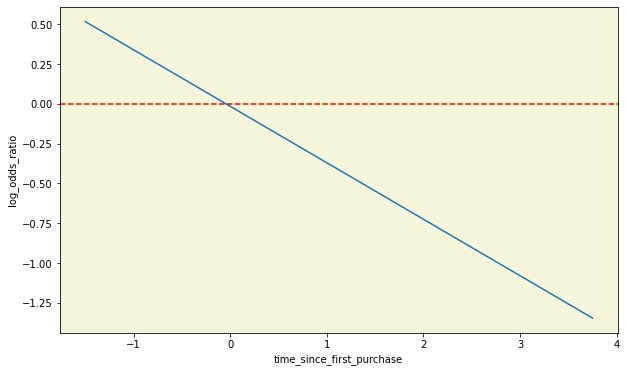

In [21]:
# Plot log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x= "time_since_first_purchase",
             y="log_odds_ratio",
             data = pred_data)

# Add a dashed horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle = "dashed", color = "red")

plt.show()

In [22]:
# Print 5 first and last values
#------------------------------
print("="*80)
print("The first five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(pred_data.head())
print(end="\n\n\n")

print("="*80)
print("The last five observation of the predicted Data ".center(80))
print("="*80, end="\n\n")
print(pred_data.tail())
print(end="\n\n\n")


               The first five observation of the predicted Data                 

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.25     0.605470                  1.0    1.534661   
2                      -1.00     0.584096                  1.0    1.404400   
3                      -0.75     0.562401                  1.0    1.285197   
4                      -0.50     0.540465                  1.0    1.176111   

   log_odds_ratio  
0        0.517008  
1        0.428309  
2        0.339610  
3        0.250912  
4        0.162213  



                The last five observation of the predicted Data                 

    time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
17                       2.75     0.270740                  0.0    0.371253   
18                       3.00     0.253587                  0.0    0.339742   
19     